In [1]:
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATTERN = '/home/eytan/storage/staff/eytankats/projects/medssl3d/data/npy128_fg80/*.npy'

In [3]:
def plot_random_volumes(volume_paths, num_samples=10):
    # Randomly select volumes
    selected_paths = random.sample(volume_paths, num_samples)

    fig, axes = plt.subplots(3, num_samples, figsize=(2*num_samples, 6))
    if num_samples == 1:  # handle special case (1 sample)
        axes = np.expand_dims(axes, axis=1)

    for col, path in enumerate(selected_paths):
        # Load volume
        vol = np.load(path)

        # Get central indices for each axis
        cx, cy, cz = [s // 2 for s in vol.shape]

        # Extract slices
        slices = [
            vol[cx, :, :],   # sagittal
            vol[:, cy, :],   # coronal
            vol[:, :, cz]    # axial
        ]

        # Plot each slice in a row
        for row, slc in enumerate(slices):
            ax = axes[row, col]
            ax.imshow(slc.T, cmap="gray", origin="lower")  # transpose for orientation
            ax.axis("off")

            if row == 0:
                ax.set_title(f"Vol {col+1}", fontsize=10)

    plt.tight_layout()
    plt.show()

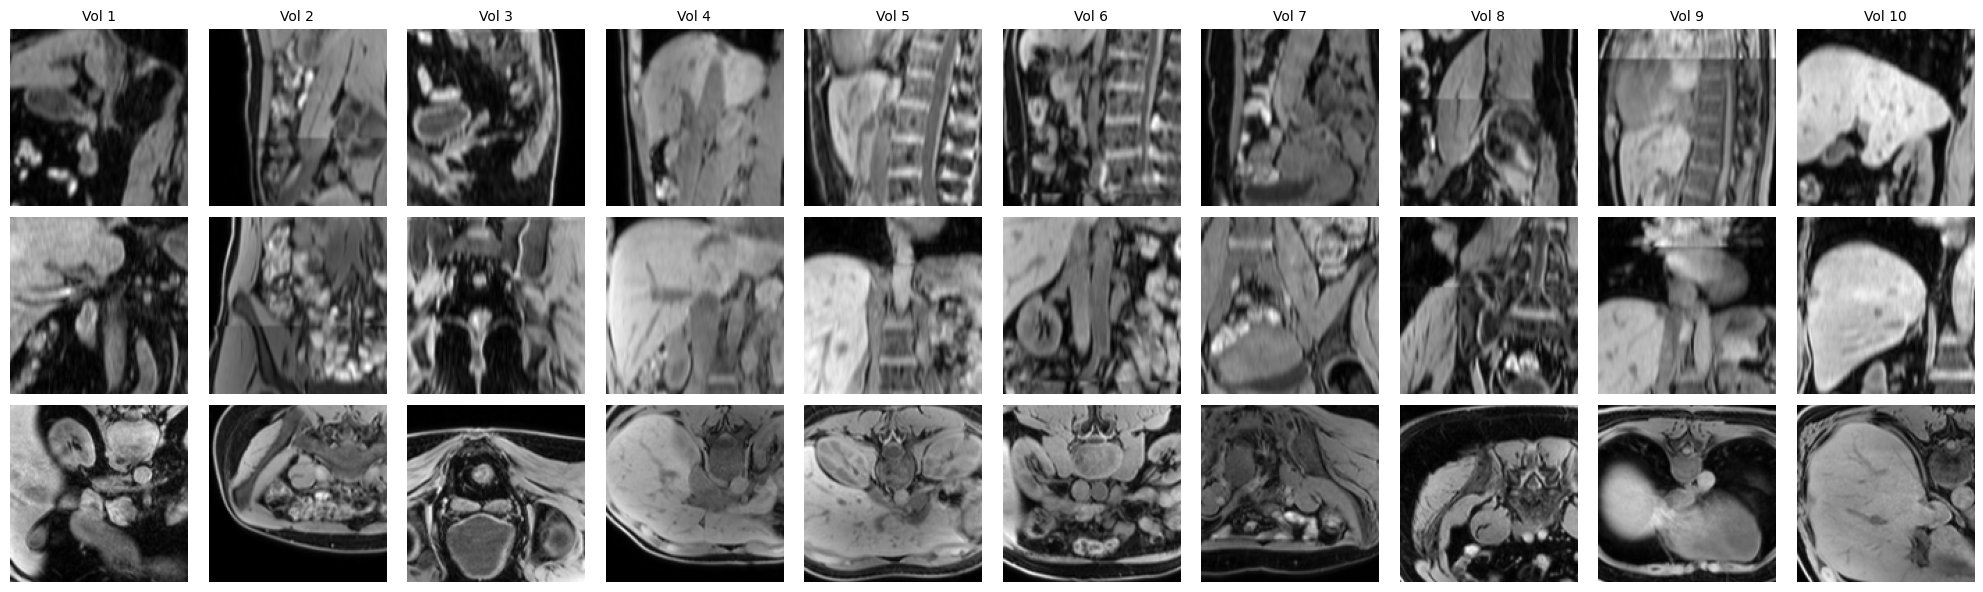

In [4]:
img_paths = glob.glob(DATA_PATTERN)
plot_random_volumes(img_paths, num_samples=10)